In [5]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")


Setup Complete


In [6]:
sales_data = pd.read_csv('train.csv')
sales_data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
sales_data.dropna(axis='columns').info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   LotShape       1460 non-null   object
 6   LandContour    1460 non-null   object
 7   Utilities      1460 non-null   object
 8   LotConfig      1460 non-null   object
 9   LandSlope      1460 non-null   object
 10  Neighborhood   1460 non-null   object
 11  Condition1     1460 non-null   object
 12  Condition2     1460 non-null   object
 13  BldgType       1460 non-null   object
 14  HouseStyle     1460 non-null   object
 15  OverallQual    1460 non-null   int64 
 16  OverallCond    1460 non-null   int64 
 17  YearBuilt      1460 non-null   int64 
 18  YearRemodAdd   1460 non-null

Предположим следующее: Цена зависит от LotArea (Размера участка в футах), OverallQual (общее качество материалов), OverallCond (общее состояние дома)

In [8]:
features = ['SalePrice', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt']
sales_data[features].corr()

,SalePrice,LotArea,OverallQual,OverallCond,YearBuilt
SalePrice,1.000000,0.263843,0.790982,-0.077856,0.522897
LotArea,0.263843,1.000000,0.105806,-0.005636,0.014228
OverallQual,0.790982,0.105806,1.000000,-0.091932,0.572323
OverallCond,-0.077856,-0.005636,-0.091932,1.000000,-0.375983
YearBuilt,0.522897,0.014228,0.572323,-0.375983,1.000000


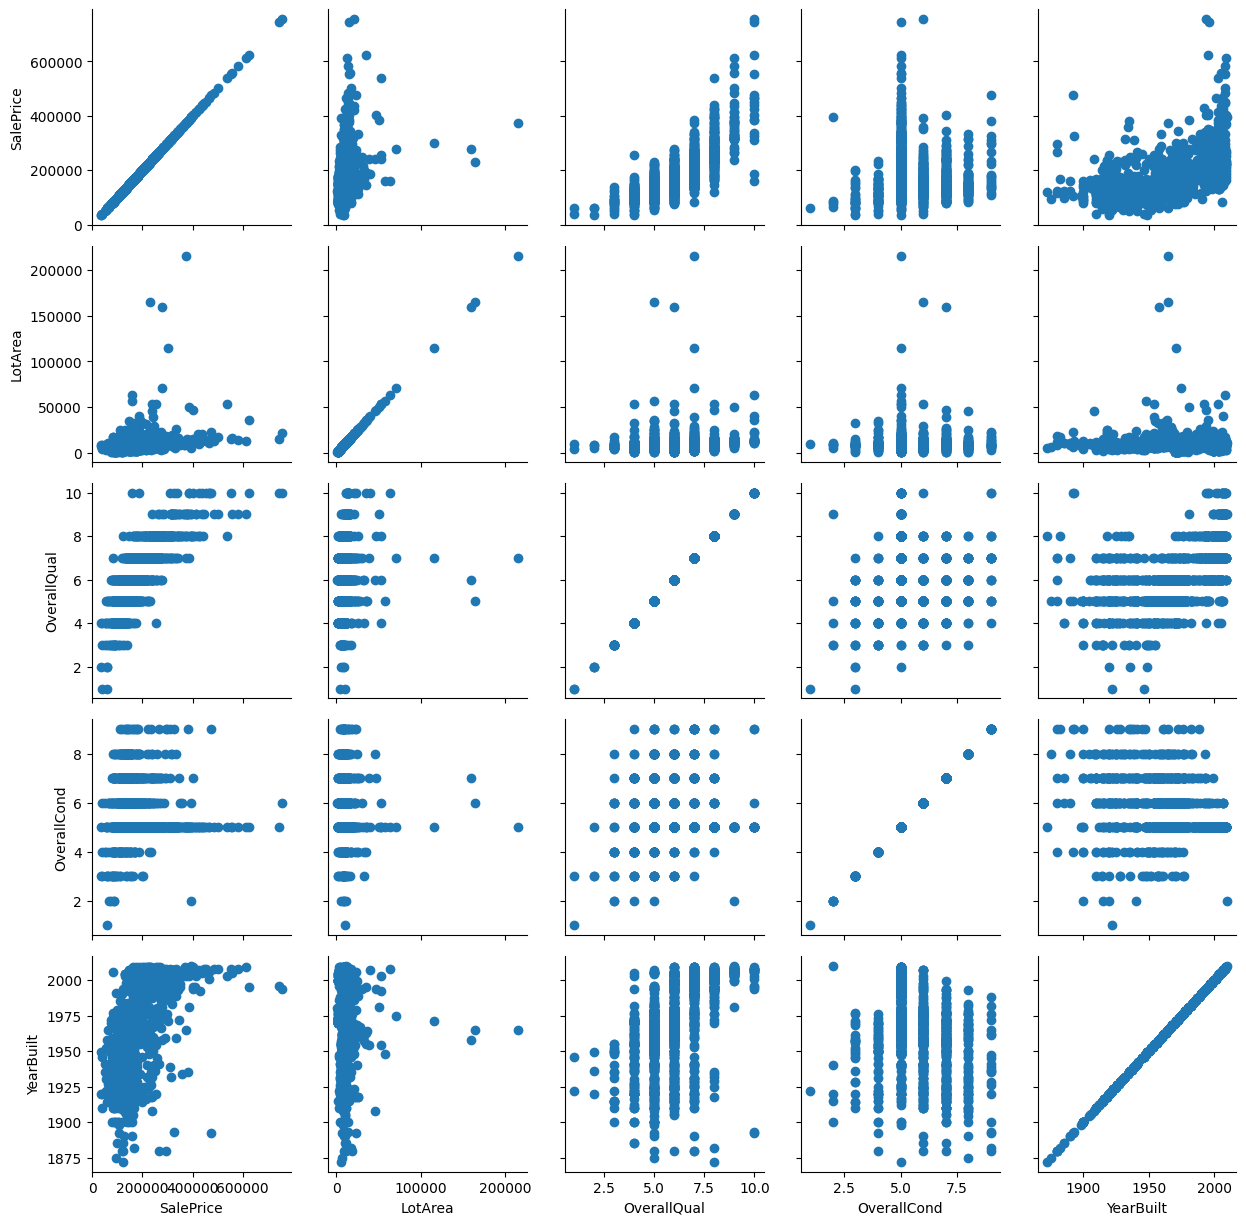

In [9]:
pair_grid_plot = sns.PairGrid(sales_data[features])
pair_grid_plot.map(plt.scatter)

Мы можем заметить, что очень высокая прямая зависимость между ценой и общим качеством материалов. Также есть некоторая зависимость между ценой и площадью участка. Удивительно, но цена почти не свяазана с общим состоянием дома. Стоит взять во внимание OverallQual и LotArea. Год постройки также имеет очень высокий коэффициент корреляции с ценой дома. Связь умеренная прямая

           SalePrice  Total_sq
SalePrice   1.000000  0.716883
Total_sq    0.716883  1.000000


<Axes: xlabel='Total_sq', ylabel='SalePrice'>

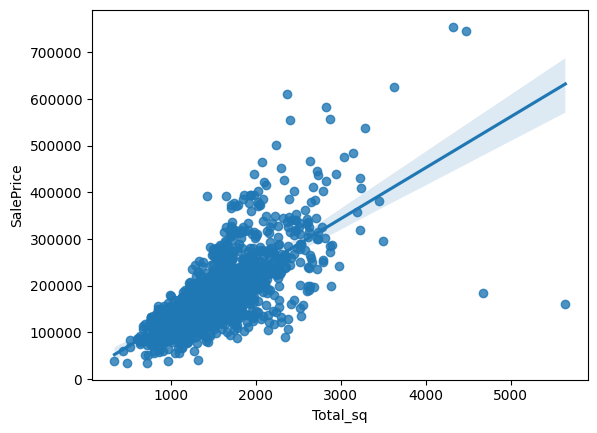

In [10]:
# Подсчитаем общую площадь (1 и 2 этажей) и то, как они влияют на стоимость жилья
sales_data['Total_sq'] = sales_data['1stFlrSF'] + sales_data['2ndFlrSF']
print(sales_data[['SalePrice', 'Total_sq']].corr())
sns.regplot(sales_data, x='Total_sq', y='SalePrice')

Видим, что очень высока корреляция между общей площадью жилья и стоимостью дома

             min     max           mean    median
LandSlope                                        
Gtl        34900  755000  179956.799566  161875.0
Mod        39300  538000  196734.138462  186700.0
Sev        61000  375000  204379.230769  185000.0


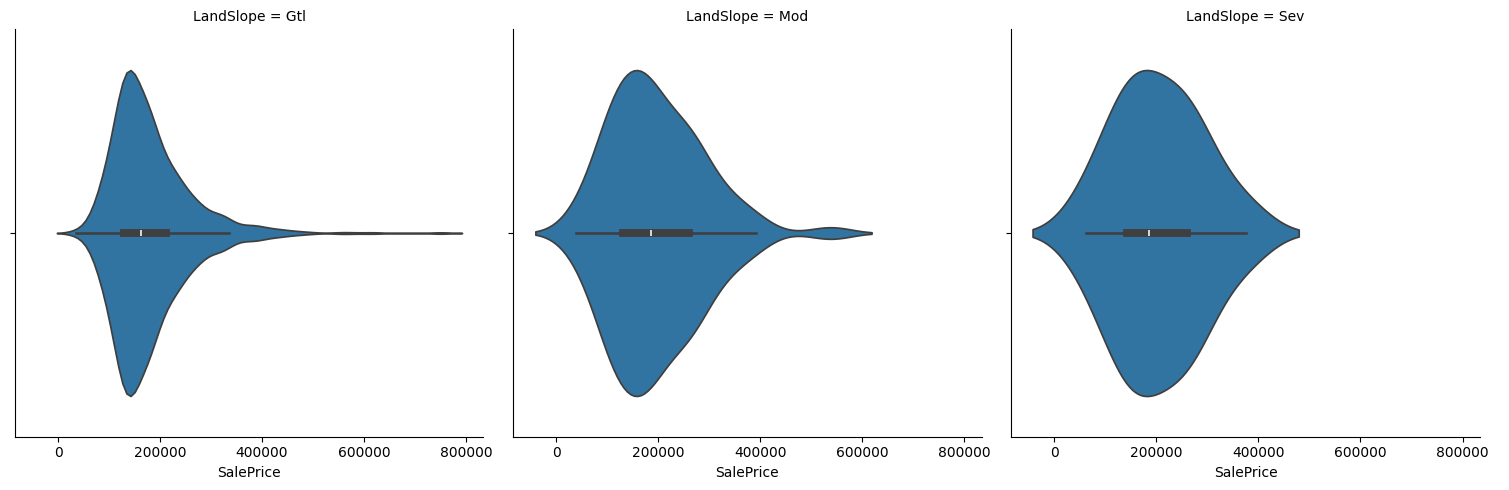

In [11]:
print(sales_data.groupby('LandSlope').SalePrice.agg(['min', 'max', 'mean', 'median']))
sns.catplot(sales_data, x='SalePrice', col='LandSlope', kind='violin')

Что касается влияния наклона участка на стоимость жилья, мы можем заметить, что основная масса жилья стоит около 180 тыс. долларов, несмотря на наклон участка. Удивительно, в среднем участки с маленьким наклоном стоят меньше, однако дома с наибольшей стоимостью имеют именно маленький наклон. Именно поэтому данный фактор не определяет стоимость однозначно и брать его не стоит

            SalePrice  Fireplaces  GarageArea  GarageCars
SalePrice    1.000000    0.466929    0.623431    0.640409
Fireplaces   0.466929    1.000000    0.269141    0.300789
GarageArea   0.623431    0.269141    1.000000    0.882475
GarageCars   0.640409    0.300789    0.882475    1.000000


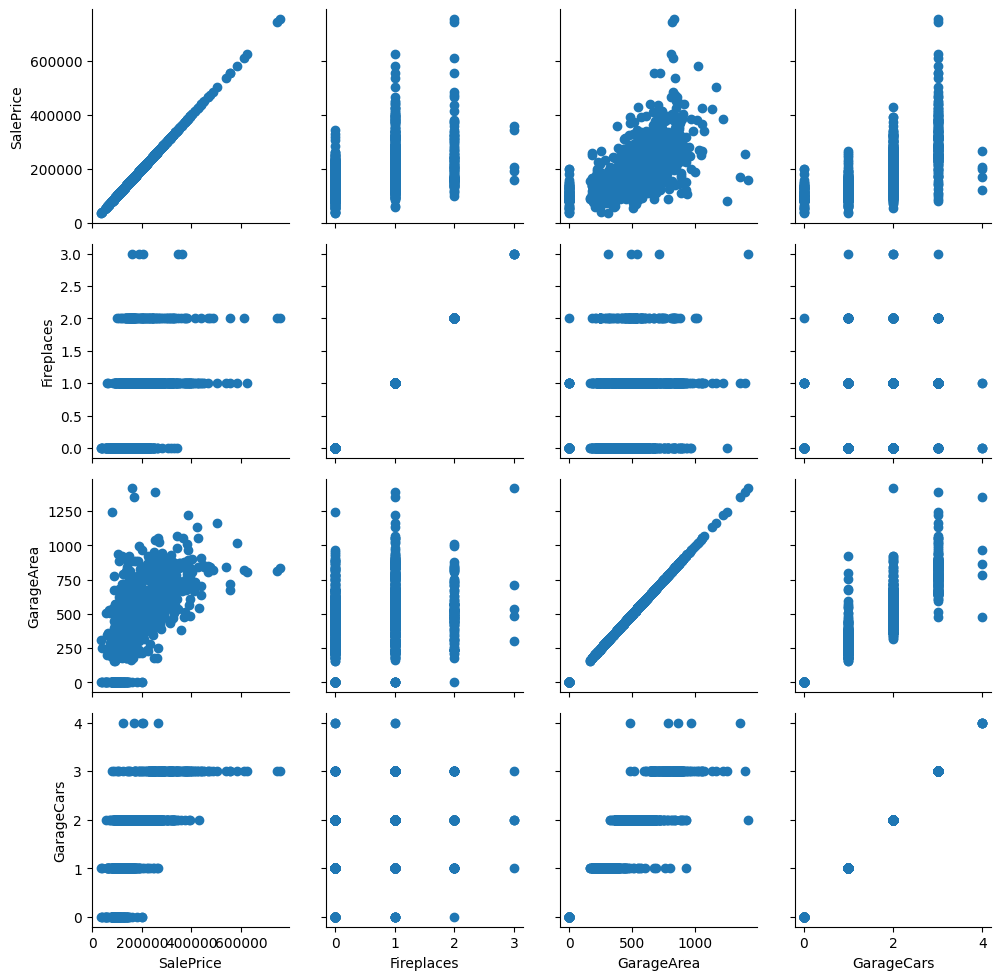

In [12]:
print(sales_data[['SalePrice', 'Fireplaces', 'GarageArea', 'GarageCars']].corr())
sns.PairGrid(sales_data[['SalePrice', 'Fireplaces', 'GarageArea', 'GarageCars']]).map(plt.scatter)

Чем больше каминов, тем выше может быть стоимость жилья. Имеется некоторая прямая связь. Также имеется достаточно тесная связь между площадью гаража (или вместительностью в машинах) и стоимостью. Стоит взять один из факторов, описывающих вместимость гаража. Два брать нельзя, так как между ними очень сильная прямая зависимость – возникнет гетероскедастичность. Выберем GarageCars, так как он показывает более высокий коэффициент корреляции

In [51]:
# Уточним выбранные нами факторы:
factors = ['LotArea', 'OverallQual', 'YearBuilt', 'Total_sq', 'GarageCars', 'Fireplaces']
sales_data[['SalePrice'] + factors].corr()

,SalePrice,LotArea,OverallQual,YearBuilt,Total_sq,GarageCars,Fireplaces
SalePrice,1.000000,0.263843,0.790982,0.522897,0.716883,0.640409,0.466929
LotArea,0.263843,1.000000,0.105806,0.014228,0.264850,0.154871,0.271364
OverallQual,0.790982,0.105806,1.000000,0.572323,0.600758,0.600671,0.396765
YearBuilt,0.522897,0.014228,0.572323,1.000000,0.217805,0.537850,0.147716
Total_sq,0.716883,0.264850,0.600758,0.217805,1.000000,0.479932,0.467488
GarageCars,0.640409,0.154871,0.600671,0.537850,0.479932,1.000000,0.300789
Fireplaces,0.466929,0.271364,0.396765,0.147716,0.467488,0.300789,1.000000


OverallQual имеет слишком большую корреляцию со многими факторами, поэтому от него стоит избавиться

In [52]:
factors.remove('OverallQual')
factors

['LotArea', 'YearBuilt', 'Total_sq', 'GarageCars', 'Fireplaces']

R^2 score = 0.7161427215720806
28590.256832057257


<Axes: title={'center': 'Comparison of predicted values with real ones'}, ylabel='SalePrice'>

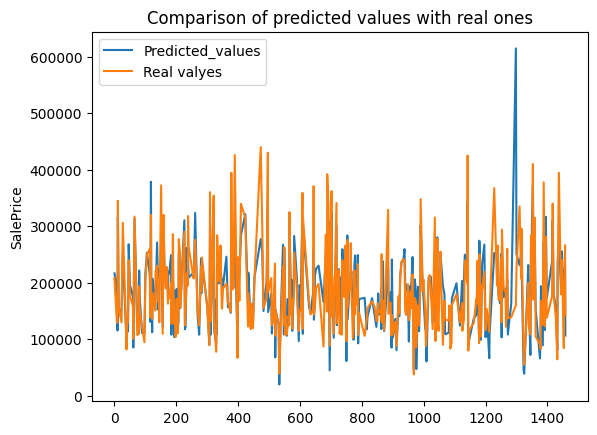

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
X = sales_data[factors]
y = sales_data.SalePrice
train_X, val_X, train_y, val_y = train_test_split(X, y)
model = LinearRegression()
model.fit(train_X, train_y)
predict_y = model.predict(val_X)
print(f'R^2 score = {model.score(train_X, train_y)}')
print(mean_absolute_error(val_y, predict_y))
plt.title('Comparison of predicted values with real ones')
sns.lineplot(pd.Series(predict_y, index=val_y.index), label='Predicted_values')
sns.lineplot(val_y, label='Real valyes')


Как мы можем увидеть, полученная модель достаточно хорошо описывает цену дома. Коэффициент детерминации составляет 70%, то есть всего лишь 30% дисперсии обусловлено факторами, которые модель не учитывает

In [54]:
test_data = pd.read_csv('test.csv')
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [55]:
test_data['Total_sq'] = test_data['1stFlrSF'] + test_data['2ndFlrSF'] #Добавляем
test_data[factors].notna().apply(lambda row: row.all(), axis=0) # Проверяем, где данные не в полном объеме

LotArea        True
YearBuilt      True
Total_sq       True
GarageCars    False
Fireplaces     True
dtype: bool

У GarageCars есть пустые ячейки. Заменим их медианными по столбцу

In [56]:
test_data.GarageCars.fillna(test_data.GarageCars.median(), inplace=True)

C:\Users\Илья\AppData\Local\Temp\ipykernel_2948\3383911069.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data.GarageCars.fillna(test_data.GarageCars.median(), inplace=True)


In [57]:
test_data[factors].notna().apply(lambda row: row.all(), axis=0)

LotArea       True
YearBuilt     True
Total_sq      True
GarageCars    True
Fireplaces    True
dtype: bool

Теперь все данные в сборе

In [58]:
X_for_prediction = test_data[factors]
X_for_prediction.head()

,LotArea,YearBuilt,Total_sq,GarageCars,Fireplaces
0,11622,1961,896,1.0,0
1,14267,1958,1329,1.0,0
2,13830,1997,1629,2.0,1
3,9978,1998,1604,2.0,1
4,5005,1992,1280,2.0,0


In [59]:
y_result = model.predict(X_for_prediction)
pd.Series(y_result, index=test_data.Id, name='SalePrice').to_csv('submission.csv')